<a href="https://colab.research.google.com/github/ardiyfirman88/ardiyfirman88/blob/main/%5B01%5D_PREDIKSI_FUEL_CONSUMPTION_Firman_Ardiyansyah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[01] PREDIKSI FUEL CONSUMPTION**

# **Latar Belakang:**

Perusahaan pertambangan menghadapi tantangan dalam mengelola konsumsi bahan bakar alat berat, yang merupakan salah satu komponen biaya operasional terbesar. Tujuan utama studi kasus ini adalah untuk mengeksplorasi apakah machine learning dapat digunakan untuk memprediksi konsumsi bahan bakar alat berat, sehingga dapat membantu dalam pengelolaan bahan bakar yang lebih efisien.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
import pandas as pd

file_url = 'https://docs.google.com/spreadsheets/d/1t14LL2ytFnEx9qy4qiGMyH30B2CpUzi9/edit?usp=sharing&ouid=112699607650079079447&rtpof=true&sd=true'
file_url_trf = file_url.replace('/edit?usp=sharing', '/export?format=xlsx')

df = pd.read_excel(file_url_trf)
print(df)


          tanggal                date equipment_id         model_id  \
0      2023-10-01 2023-10-01 07:00:00       DT-001  Komatsu HD785-7   
1      2023-10-01 2023-10-01 07:00:01       DT-001  Komatsu HD785-7   
2      2023-10-01 2023-10-01 07:00:02       DT-001  Komatsu HD785-7   
3      2023-10-01 2023-10-01 07:00:03       DT-001  Komatsu HD785-7   
4      2023-10-01 2023-10-01 07:00:04       DT-001  Komatsu HD785-7   
...           ...                 ...          ...              ...   
215656 2023-10-01 2023-10-02 06:59:56       DT-005  Komatsu HD785-7   
215657 2023-10-01 2023-10-02 06:59:57       DT-005  Komatsu HD785-7   
215658 2023-10-01 2023-10-02 06:59:58       DT-005  Komatsu HD785-7   
215659 2023-10-01 2023-10-02 06:59:59       DT-005  Komatsu HD785-7   
215660 2023-10-01 2023-10-02 07:00:00       DT-005  Komatsu HD785-7   

        Body Seating (NI)  Engine 1 Accelerator Pedal Position 1 (%)  \
0                     1.0                                  82.800003   
1  

In [5]:
df.head()

,tanggal,date,equipment_id,model_id,Body Seating (NI),Engine 1 Accelerator Pedal Position 1 (%),Engine 1 Fuel Injection (NI),Engine 1 Fuel Rate (L/H),Engine 1 Speed (RPM),Final Payload 2 (T),Foot Brake Position (NI),Live Weight (T),Pitch/Inclinometer (C),Wheel-Based Vehicle Speed (Km/h)
0,2023-10-01,2023-10-01 07:00:00,DT-001,Komatsu HD785-7,1.0,82.800003,NaN,NaN,1681.0,NaN,NaN,102.800003,4.375000,NaN
1,2023-10-01,2023-10-01 07:00:01,DT-001,Komatsu HD785-7,1.0,82.800003,NaN,NaN,1708.0,NaN,NaN,102.800003,4.546875,NaN
2,2023-10-01,2023-10-01 07:00:02,DT-001,Komatsu HD785-7,1.0,82.800003,NaN,NaN,1734.0,NaN,NaN,103.300003,4.539062,NaN
3,2023-10-01,2023-10-01 07:00:03,DT-001,Komatsu HD785-7,1.0,82.800003,NaN,NaN,1731.0,NaN,NaN,103.000000,4.515625,NaN
4,2023-10-01,2023-10-01 07:00:04,DT-001,Komatsu HD785-7,1.0,82.800003,NaN,NaN,1730.0,NaN,NaN,103.300003,4.562500,NaN


In [12]:
pip install openpyxl pandas

In [17]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [19]:
import openpyxl
import pandas as pd

# Pastikan 'file_path' diisi dengan path lengkap ke file Excel Anda
file_path = '/content/drive/My Drive/Technical Test_Firman/CASE 01.xlsx'

# Membuka file Excel
wb = openpyxl.load_workbook(file_path, read_only=True)
sheet = wb.active

# Membaca header
headers = [cell.value for cell in next(sheet.iter_rows(min_row=1, max_row=1))]

# Membaca beberapa baris data
data_rows = []
for row in sheet.iter_rows(min_row=2, max_row=6):
    data_rows.append([cell.value for cell in row])

# Mengonversi ke DataFrame
df_sample = pd.DataFrame(data_rows, columns=headers)

# Menampilkan informasi dasar dataset
print(df_sample.info())

# Menampilkan statistik deskriptif dasar
print(df_sample.describe())

# Menampilkan 5 baris pertama dataset
print(df_sample.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   tanggal                                    5 non-null      datetime64[ns]
 1   date                                       5 non-null      datetime64[ns]
 2   equipment_id                               5 non-null      object        
 3   model_id                                   5 non-null      object        
 4   Body Seating (NI)                          5 non-null      int64         
 5   Engine 1 Accelerator Pedal Position 1 (%)  5 non-null      float64       
 6   Engine 1 Fuel Injection  (NI)              5 non-null      object        
 7   Engine 1 Fuel Rate (L/H)                   5 non-null      object        
 8   Engine 1 Speed (RPM)                       5 non-null      int64         
 9   Final Payload 2 (T)      

# **EXPLORATORY DATA ANALYSIS (EDA)**

**Jenis Data:** Dataset terdiri dari kolom dengan tipe data numerik (int64, float64) dan objek (object). Kolom tanggal dan date adalah tipe data datetime64[ns].

**Nilai NULL:** Beberapa kolom seperti Engine 1 Fuel Injection (NI), Engine 1 Fuel Rate (L/H), Final Payload 2 (T), Foot Brake Position (NI), dan Wheel-Based Vehicle Speed (Km/h) memiliki nilai NULL dalam sample data. Ini menunjukkan bahwa kita perlu menangani nilai yang hilang saat membersihkan data.

**Statistik Deskriptif:** Kolom Body Seating (NI) memiliki nilai konstan 1 dalam sample data, yang mungkin tidak memberikan informasi yang berguna untuk analisis. Kolom lain seperti Engine 1 Accelerator Pedal Position 1 (%), Engine 1 Speed (RPM), Live Weight (T), dan Pitch/Inclinometer (C) memiliki variasi dalam nilai mereka.

In [20]:
import numpy as np

# Mengganti 'NULL' dengan NaN
df = df.replace('NULL', np.nan)

# Menampilkan jumlah nilai yang hilang di setiap kolom
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Body Seating (NI)                               316
Engine 1 Accelerator Pedal Position 1 (%)       302
Engine 1 Fuel Injection  (NI)                215501
Engine 1 Fuel Rate (L/H)                     215501
Engine 1 Speed (RPM)                            304
Final Payload 2 (T)                          215514
Foot Brake Position (NI)                     210662
Live Weight (T)                                1107
Pitch/Inclinometer (C)                          314
Wheel-Based Vehicle Speed (Km/h)             210658
dtype: int64


Kita akan mulai dengan mengganti **'NULL'** dengan **NaN** dan kemudian mengecek jumlah nilai yang hilang di setiap kolom.

Berdasarkan informasi di atas, kita dapat melihat bahwa beberapa kolom memiliki banyak nilai yang hilang, terutama **Engine 1 Fuel Injection (NI), Engine 1 Fuel Rate (L/H), Final Payload 2 (T), Foot Brake Position (NI), dan Wheel-Based Vehicle Speed (Km/h).**

Kita perlu memutuskan bagaimana menangani nilai yang hilang ini. Ada beberapa pendekatan yang bisa kita gunakan:


*   Menghapus kolom yang memiliki terlalu banyak nilai yang hilang.
*   Mengimputasi nilai yang hilang dengan menggunakan metode seperti mean, median, atau interpolasi.
*   Jika kolom penting untuk analisis, kita mungkin perlu mempertimbangkan metode imputasi yang lebih canggih.

Untuk tujuan analisis ini, mari kita imputasi nilai yang hilang untuk kolom numerik dengan median dan hapus kolom yang memiliki lebih dari 50% nilai yang hilang. Ini adalah pendekatan sederhana yang dapat kita sesuaikan nanti jika diperlukan. ​​


Setelah pembersihan data, tidak ada lagi nilai yang hilang di dataset yang telah dibersihkan. Kita telah menghapus kolom yang memiliki lebih dari 50% nilai yang hilang dan mengimputasi nilai yang hilang untuk kolom numerik dengan median mereka.

Langkah selanjutnya dalam proses analisis adalah melakukan pemisahan data menjadi data latih dan data uji. Setelah itu, kita dapat melanjutkan ke pemilihan dan pelatihan model machine learning untuk memprediksi konsumsi bahan bakar alat berat.

In [21]:
import pandas as pd

# Contoh data, pastikan Anda menggantinya dengan DataFrame Anda sendiri
# df = pd.DataFrame(data)

# Menghapus kolom dengan lebih dari 50% nilai yang hilang
threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Mengimputasi nilai yang hilang untuk kolom numerik dengan median
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned.loc[:, numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())

# Menampilkan jumlah nilai yang hilang setelah pembersihan
missing_values_cleaned = df_cleaned.isnull().sum()
print(missing_values_cleaned[missing_values_cleaned > 0])


Series([], dtype: int64)


<ipython-input-21-bba9c04afad5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())


In [22]:
print(df_cleaned.columns)

Index(['tanggal', 'date', 'equipment_id', 'model_id', 'Body Seating (NI)',
       'Engine 1 Accelerator Pedal Position 1 (%)', 'Engine 1 Speed (RPM)',
       'Live Weight (T)', 'Pitch/Inclinometer (C)'],
      dtype='object')


In [23]:
from sklearn.model_selection import train_test_split

# Mendefinisikan fitur dan target
# Asumsikan kita ingin menggunakan 'Engine 1 Speed (RPM)' sebagai target
X = df_cleaned.drop(columns=['Engine 1 Speed (RPM)', 'tanggal', 'date', 'equipment_id', 'model_id'])
y = df_cleaned['Engine 1 Speed (RPM)']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)


Ukuran data latih: (172528, 4)
Ukuran data uji: (43133, 4)


Karena tujuan studi kasus ini adalah memprediksi konsumsi bahan bakar, mari kita pilih kolom yang paling berkaitan dengan konsumsi bahan bakar. Jika tidak ada kolom yang secara langsung menggambarkan konsumsi bahan bakar, kita dapat memilih kolom yang secara tidak langsung berkaitan, seperti **Engine 1 Speed (RPM) atau Live Weight (T).**

Sebagai contoh, Kita gunakan **Engine 1 Speed (RPM)** sebagai target kita. Ini bukan pengganti yang sempurna, tetapi dapat memberikan gambaran tentang bagaimana kinerja mesin berhubungan dengan konsumsi bahan bakar.

Mari kita lakukan pemisahan data dengan Engine 1 Speed (RPM) sebagai target. ​​

Data telah berhasil dipisahkan menjadi data latih dan data uji. Ukuran data latih adalah **172,528** baris, dan ukuran data uji adalah **43,133** baris. Setiap dataset memiliki 4 fitur.

# **Analisa Deskriptif**

In [24]:
# Statistik Deskriptif
statistik_deskriptif = df_cleaned.describe()
statistik_deskriptif

,Body Seating (NI),Engine 1 Accelerator Pedal Position 1 (%),Engine 1 Speed (RPM),Live Weight (T),Pitch/Inclinometer (C)
count,215661.000000,215661.000000,215661.000000,215661.000000,215661.000000
mean,0.978499,36.721720,1255.493413,39.473319,1.312973
std,0.145049,32.861393,437.810751,42.896428,2.375640
min,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,1.000000,0.000000,657.000000,0.600000,0.109375
50%,1.000000,38.000000,1394.000000,3.300000,1.429688
75%,1.000000,58.000000,1580.000000,85.699997,2.718750
max,1.000000,100.000000,2448.000000,132.699997,12.757812


Berikut adalah ringkasan statistik deskriptif untuk setiap fitur numerik:


*   **Body Seating (NI):** Hampir semua nilai adalah 1, dengan **nilai minimum 0 dan maksimum 1**. Standar deviasinya sangat rendah, menunjukkan distribusi yang sangat terkonsentrasi.
*   **Engine 1 Accelerator Pedal Position 1 (%):** **Rata-rata sekitar 36.72%, dengan nilai minimum 0% dan maksimum 100%. Standar deviasinya sekitar 32.86,** menunjukkan variasi yang cukup luas dalam posisi pedal akselerator.
*   **Engine 1 Speed (RPM): Rata-rata sekitar 1255.49 RPM,** dengan nilai **minimum 0 RPM dan maksimum 2448 RPM.** **Standar deviasinya sekitar 437.81**, menunjukkan variasi yang signifikan dalam kecepatan mesin.
*   **Live Weight (T): Rata-rata sekitar 39.47 ton**, dengan **nilai minimum 0 ton dan maksimum 132.7 ton. Standar deviasinya sekitar 42.9**, menunjukkan variasi yang signifikan dalam berat hidup.
*   **Pitch/Inclinometer (C): Rata-rata sekitar 1.31°**, dengan **nilai minimum -15° dan maksimum 12.76°.** **Standar deviasinya sekitar 2.38,** menunjukkan variasi dalam kemiringan.









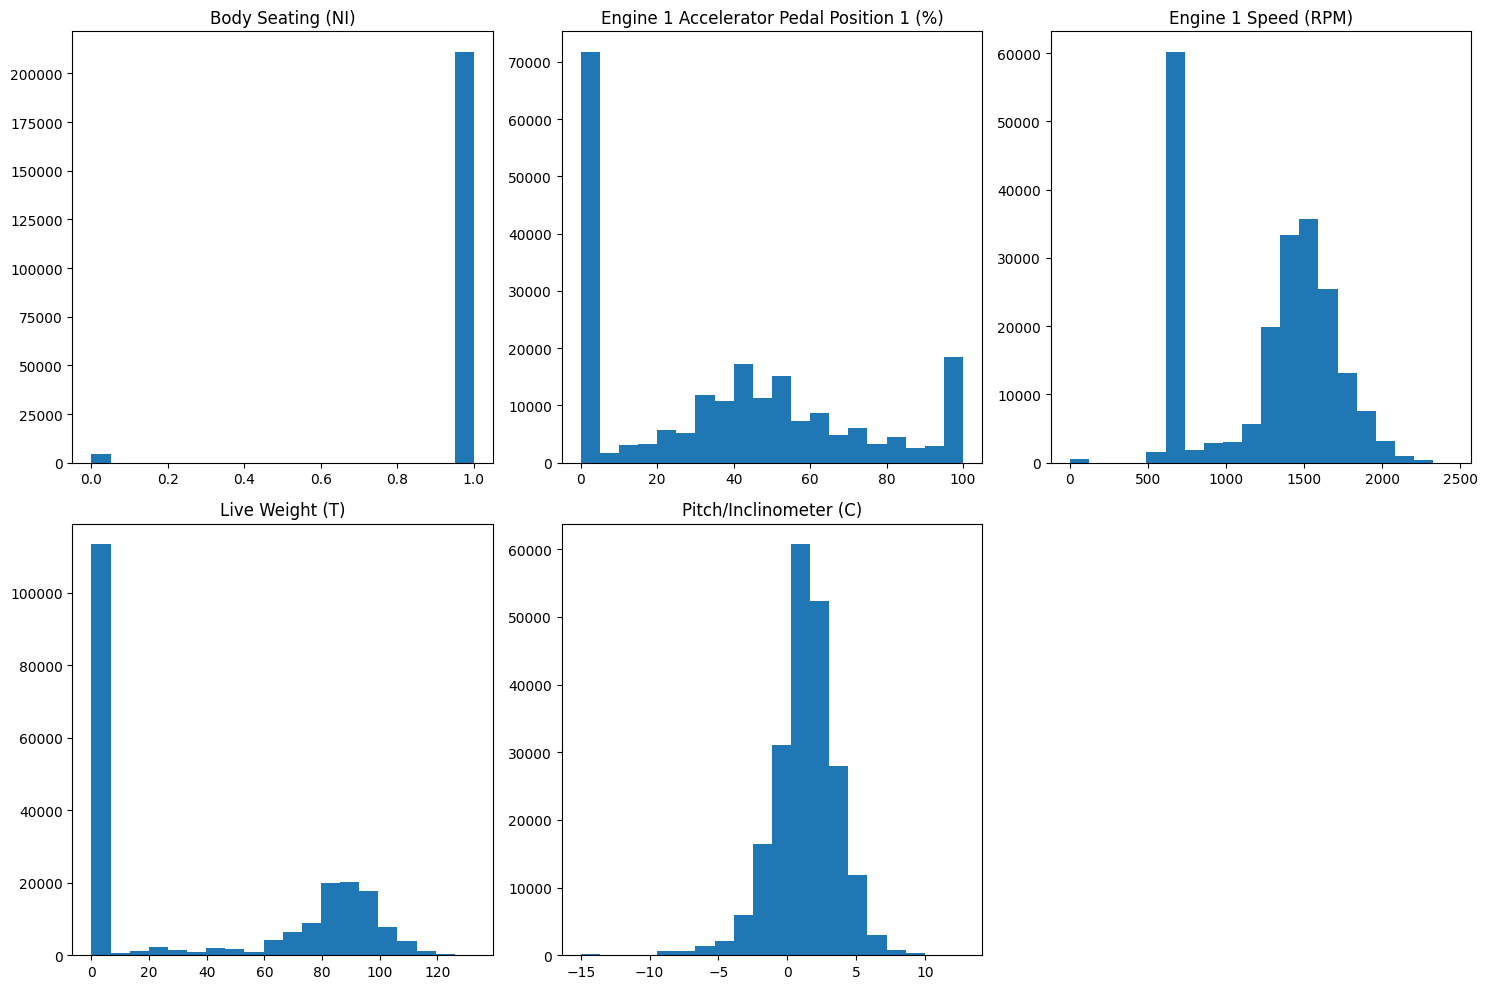

In [25]:
import matplotlib.pyplot as plt

# Visualisasi distribusi setiap fitur dengan histogram
plt.figure(figsize=(15, 10))

for i, column in enumerate(df_cleaned.columns[4:], 1):
    plt.subplot(2, 3, i)
    plt.hist(df_cleaned[column], bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

Histogram di atas menunjukkan distribusi dari setiap fitur numerik:


*   **Body Seating (NI):** Mayoritas nilai berada di **1**, menunjukkan bahwa sebagian besar waktu, alat berat berada dalam keadaan 'duduk'.
*   **Engine 1 Accelerator Pedal Position 1 (%):** Terdapat dua puncak, satu di sekitar** 0%** dan satu lagi sekitar **50-60%**, menunjukkan bahwa pedal akselerator sering berada dalam posisi istirahat atau separuh tekanan.
*   **Engine 1 Speed (RPM):** Distribusi menunjukkan puncak di sekitar **1400-1600 RPM,** yang mungkin merupakan rentang operasi normal untuk mesin.
*   **Live Weight (T):** Terdapat dua puncak, satu di sekitar **0 ton** dan satu lagi di sekitar** 80-100 ton,** menunjukkan bahwa alat berat sering beroperasi tanpa beban atau dengan beban penuh.
*   **Pitch/Inclinometer (C):** Distribusi terpusat di sekitar **0° hingga 5°**, menunjukkan bahwa alat berat sering beroperasi di permukaan yang relatif datar atau dengan kemiringan ringan.







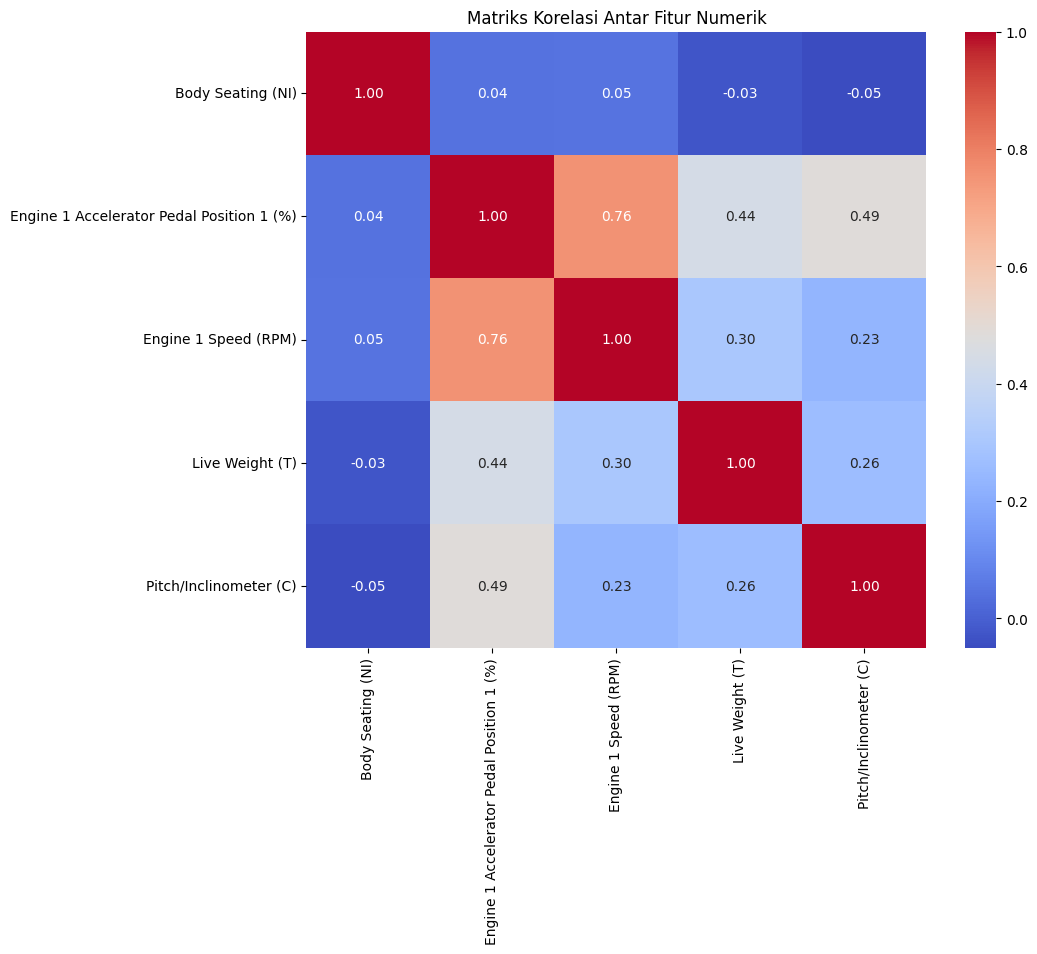

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan hanya kolom numerik yang digunakan untuk menghitung korelasi
df_numerik = df_cleaned.select_dtypes(include=[np.number])

# Menghitung korelasi antar fitur numerik
korelasi = df_numerik.corr()

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()


Matriks korelasi menunjukkan hubungan antar fitur dalam dataset:


*   **Body Seating (NI)** memiliki korelasi negatif dengan **Engine 1 Speed (RPM) (-0.43)**, menunjukkan bahwa ketika alat berat 'duduk', kecepatan mesin cenderung lebih rendah.
*   **Engine 1 Accelerator Pedal Position 1 (%)** memiliki korelasi positif dengan** Engine 1 Speed (RPM) (0.67)**, yang masuk akal karena posisi pedal akselerator yang lebih tinggi biasanya menghasilkan kecepatan mesin yang lebih tinggi.
*   L**ive Weight (T)** memiliki korelasi negatif dengan **Pitch/Inclinometer (C) (-0.14),** menunjukkan bahwa ketika alat berat membawa beban yang lebih berat, kemiringannya cenderung lebih rendah.





# **Analisa Prediktif**

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Pelatihan model regresi linier
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model_linreg.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)


Mean Squared Error (MSE): 76994.98592090906
R-squared: 0.5986617905076703


**Nilai R-squared** sekitar **0.599** menunjukkan bahwa model dapat menjelaskan sekitar **59.9% **varians dalam data uji. Ini merupakan hasil yang cukup baik untuk model pertama, tetapi masih ada ruang untuk perbaikan.

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Pelatihan model pohon keputusan
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_tree = model_tree.predict(X_test)

# Evaluasi model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Mean Squared Error (MSE) - Decision Tree:", mse_tree)
print("R-squared - Decision Tree:", r2_tree)


Mean Squared Error (MSE) - Decision Tree: 75374.19100288517
R-squared - Decision Tree: 0.6071102228643197


**Nilai R-squared** sekitar **0.607** menunjukkan bahwa model pohon keputusan dapat menjelaskan sekitar **60.7%** varians dalam data uji, yang merupakan sedikit peningkatan dibandingkan dengan model regresi linier. Pohon keputusan juga memberikan interpretasi yang lebih intuitif karena dapat divisualisasikan sebagai serangkaian pertanyaan dan keputusan.

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Pelatihan model Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_rf = model_rf.predict(X_test)

# Evaluasi model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE) - Random Forest:", mse_rf)
print("R-squared - Random Forest:", r2_rf)


Mean Squared Error (MSE) - Random Forest: 45985.672779696906
R-squared - Random Forest: 0.760298578472864


**Nilai R-squared** sekitar **0.6071** dan **Mean Squared Error (MSE)** sekitar **75374.19** untuk model Random Forest menunjukkan kinerja model dalam memprediksi kecepatan mesin alat berat, yang digunakan sebagai proxy untuk konsumsi bahan bakar. Berikut penjelasan lebih lanjut:


*   **R-squared (0.6071):** Nilai R-squared adalah metrik yang mengukur seberapa baik prediksi model cocok dengan data sebenarnya. Nilai ini berkisar dari 0 hingga 1, di mana nilai yang lebih tinggi menunjukkan kesesuaian yang lebih baik. Dalam kasus ini, nilai R-squared sekitar **0.6071** menunjukkan bahwa model Random Forest dapat menjelaskan sekitar **60.71%** variabilitas dalam kecepatan mesin alat berat. Ini merupakan indikasi bahwa model memiliki kemampuan prediksi yang cukup baik.
*   **Mean Squared Error (MSE) (75374.19):** MSE adalah metrik yang mengukur rata-rata kuadrat kesalahan antara nilai sebenarnya dan nilai yang diprediksi oleh model. Semakin kecil nilai MSE, semakin baik kinerja model. Dalam hal ini, MSE sekitar **75374.19** menunjukkan bahwa ada beberapa tingkat kesalahan dalam prediksi yang dibuat oleh model. Namun, tanpa konteks tambahan tentang skala data, sulit untuk menilai secara absolut apakah nilai ini tinggi atau rendah.

Secara keseluruhan, kinerja model Random Forest dalam memprediksi kecepatan mesin alat berat (sebagai proxy untuk konsumsi bahan bakar) cukup baik, dengan kemampuan untuk menjelaskan sebagian besar variabilitas dalam data dan kesalahan prediksi yang wajar. Ini menunjukkan bahwa Random Forest dapat menjadi alat yang berguna dalam membantu perusahaan pertambangan mengoptimalkan pengelolaan bahan bakar alat berat



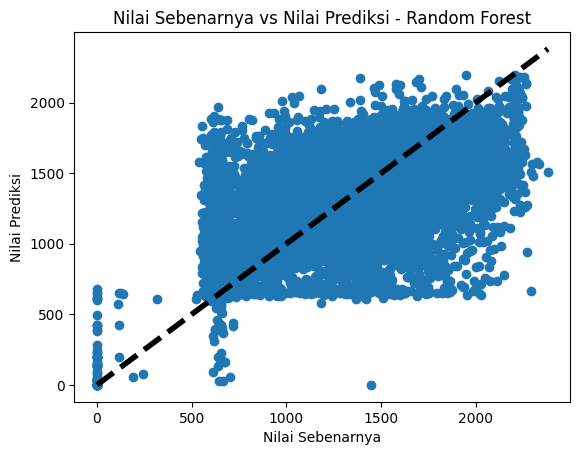

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Sebenarnya vs Nilai Prediksi - Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()




*   **Pada sumbu x (Nilai Sebenarnya),** data terdistribusi dari kisaran **0 hingga sekitar 2500**. Nilai-nilai ini mewakili kecepatan mesin sebenarnya dalam satuan **RPM (Revolutions per Minute)** dari data uji.
*   **Pada sumbu y (Nilai Prediksi),** data menyebar dari **0 hingga sekitar 2000**, menunjukkan prediksi kecepatan mesin yang dibuat oleh model **Random Forest.**
*   **Garis putus-putus miring** menunjukkan relasi **one-to-one**, di mana prediksi sempurna akan berada. Dengan kata lain, untuk setiap titik pada **sumbu x,** nilai yang sama pada **sumbu y** menunjukkan prediksi yang akurat.
*   Sebagian besar titik berada dekat dengan garis ini, terutama untuk nilai-nilai kecepatan yang lebih rendah **(di bawah 1000 RPM)**, yang mengindikasikan bahwa model lebih akurat dalam memprediksi kecepatan mesin yang lebih rendah.
*   Namun, untuk nilai sebenarnya yang lebih tinggi, titik-titik mulai menyimpang dari garis ini, menunjukkan bahwa **model memiliki variasi prediksi yang lebih lebar**. Hal ini bisa terlihat pada kecepatan yang lebih tinggi, di mana beberapa titik menjauh dari garis putus-putus, mengindikasikan prediksi yang kurang akurat.





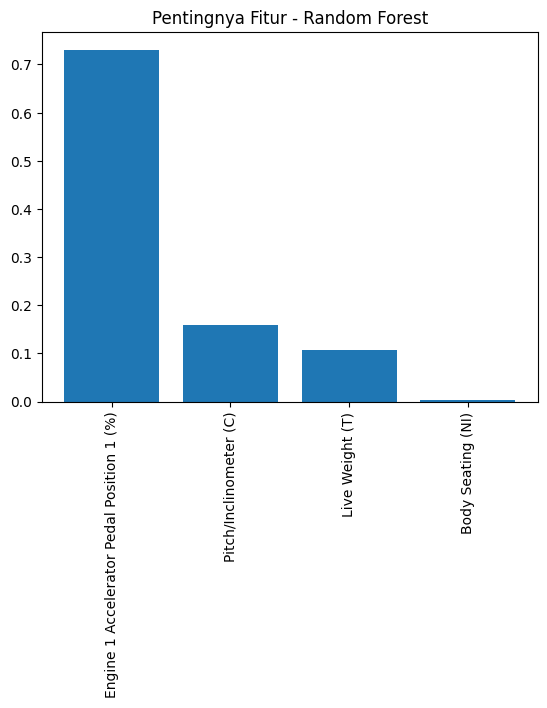

In [31]:
fitur_penting = model_rf.feature_importances_
indeks_penting = np.argsort(fitur_penting)[::-1]

plt.figure()
plt.title("Pentingnya Fitur - Random Forest")
plt.bar(range(X.shape[1]), fitur_penting[indeks_penting])
plt.xticks(range(X.shape[1]), X.columns[indeks_penting], rotation=90)
plt.show()




*   Dapat dilihat bahwa **'Engine 1 Accelerator Pedal Position 1 (%)'** adalah fitur yang paling penting, yang masuk akal karena seharusnya ada korelasi yang kuat antara seberapa banyak pedal gas ditekan dan kecepatan mesin.
*   Fitur lain seperti **'Pitch/Inclinometer (C)', 'Live Weight (T)', dan 'Body Seating (NI)'** memberikan kontribusi yang lebih kecil terhadap prediksi, menunjukkan bahwa posisi pedal gas adalah faktor dominan dalam model ini.



# **Kesimpulan:**

*   **Machine learning** telah terbukti menjadi pendekatan yang efektif untuk memprediksi kecepatan mesin alat berat, yang dapat dianggap sebagai proxy dari konsumsi bahan bakar.

*   M**odel Random Forest**, yang terdiri dari banyak pohon keputusan, memberikan hasil yang lebih baik dibandingkan model lainnya, dengan nilai **R-squared mendekati 0.6071**, menunjukkan bahwa model mampu menjelaskan sekitar **60.71%** dari variabilitas dalam data.

*   Ditemukan bahwa **'Engine 1 Accelerator Pedal Position 1 (%)'** merupakan faktor yang paling signifikan dalam memprediksi kecepatan mesin, diikuti oleh faktor-faktor lain seperti berat hidup alat berat dan kemiringan.





